In [162]:
# Importing the required library 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')

In [164]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [165]:
df.columns = ['Id number', 'Refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type of glass']

#This seems to be a multiclass classification problem as the target variable, 'Type of glass', is categorical variable which has more than two categories.

In [166]:
df.head()

,Id number,Refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [167]:
df.tail()

,Id number,Refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [168]:
df.shape

(213, 11)

In [213]:

print ("No. of rows",df.shape[0])
print ("No. of columns",df.shape[1])

No. of rows 213
No. of columns 11


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id number         213 non-null    int64  
 1   Refractive index  213 non-null    float64
 2   Sodium            213 non-null    float64
 3   Magnesium         213 non-null    float64
 4   Aluminum          213 non-null    float64
 5   Silicon           213 non-null    float64
 6   Potassium         213 non-null    float64
 7   Calcium           213 non-null    float64
 8   Barium            213 non-null    float64
 9   Iron              213 non-null    float64
 10  Type of glass     213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [171]:
df.isnull().sum()

Id number           0
Refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type of glass       0
dtype: int64

<AxesSubplot:>

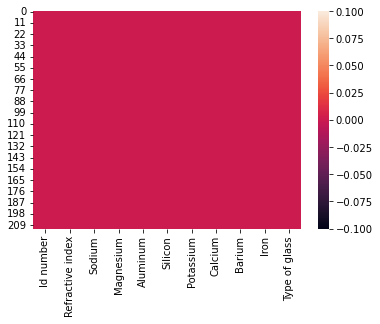

In [214]:
# checking the null values via the maps
sns.heatmap(df.isnull())

In [215]:
df.dtypes

Id number             int64
Refractive index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type of glass         int64
dtype: object

In [216]:
#Checking the statistics of the dataframe.
df.describe()

,Id number,Refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


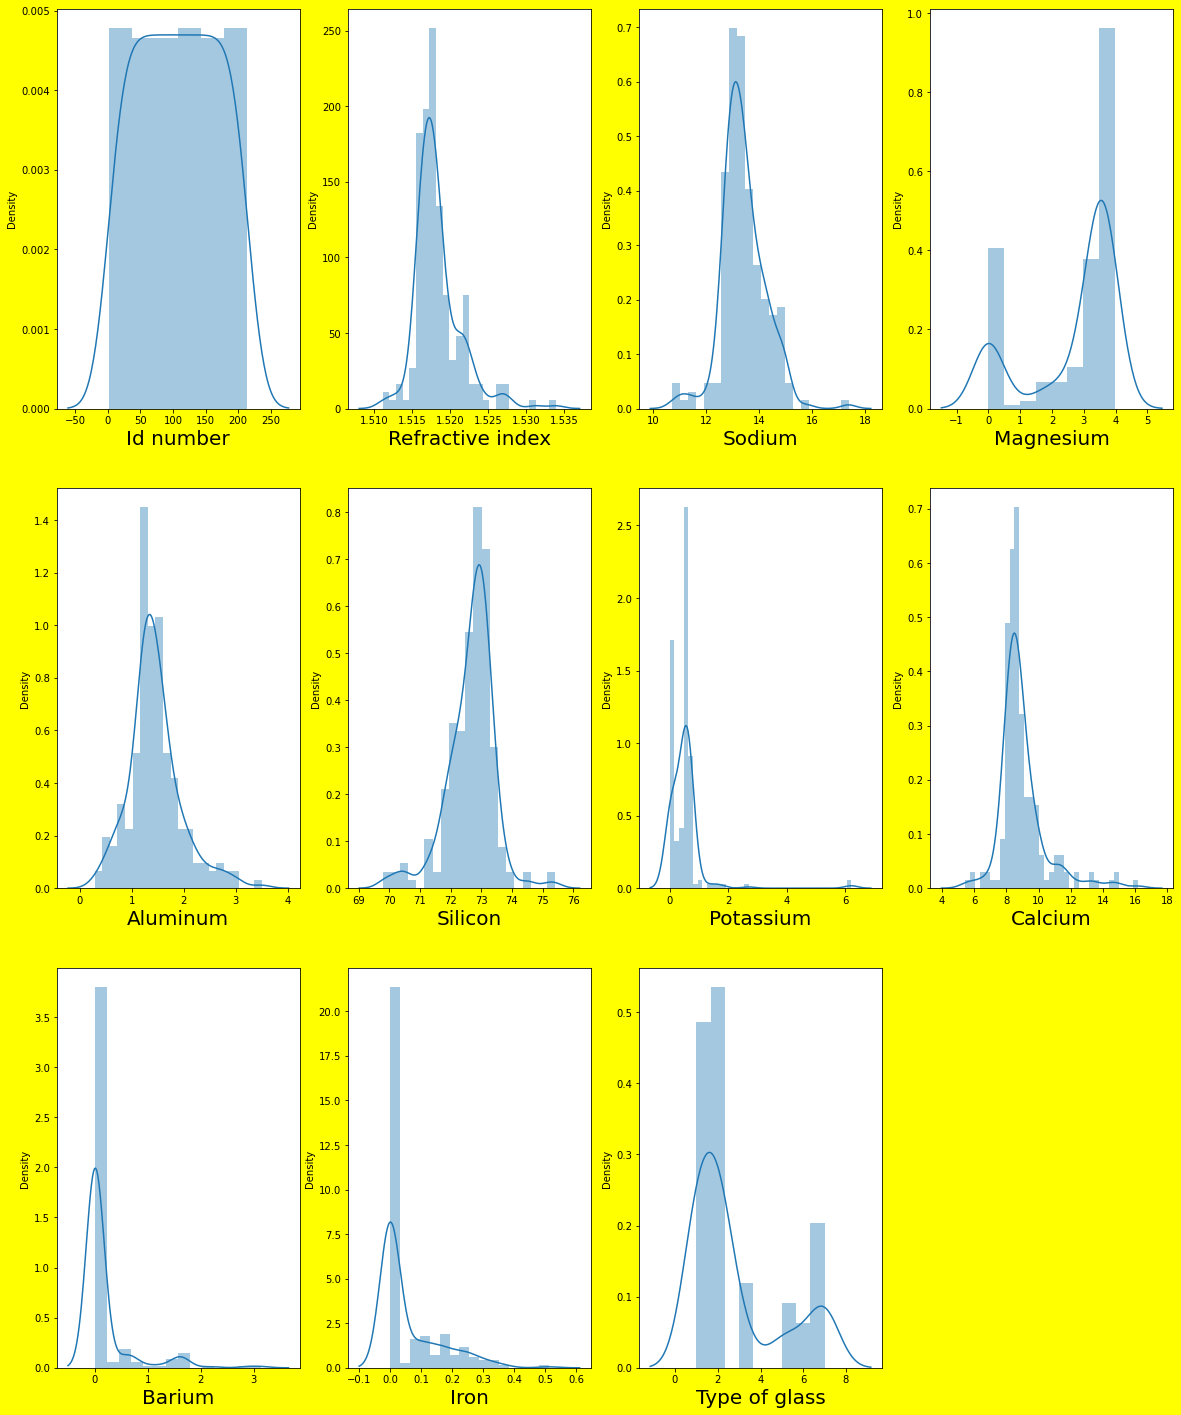

In [218]:
#To check the distribution of the data in every column
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for columns in df:
    if plotnumber<=11:             # since there are 11 columns in the data set
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=20)
    
    plotnumber+=1
plt.show()
               

In [219]:
#The skewness has been observed in the dataset.

In [220]:
df.skew()

Id number           0.000000
Refractive index    1.639658
Sodium              0.457318
Magnesium          -1.154323
Aluminum            0.900017
Silicon            -0.744546
Potassium           6.549276
Calcium             2.040591
Barium              3.406749
Iron                1.747173
Type of glass       1.108861
dtype: float64

Observation of the skewness : the threshold is taken as +/- 0.65, the columns with skewness are : Refractive index, Magnesium, Aluminum, Silicon, Potassium, Calcium, Barium and the Iron.  

In [221]:
#divinding the data into the labels and the features. 
X = df.drop(columns=['Type of glass'])
Y = df['Type of glass']

In [222]:
X

,Id number,Refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


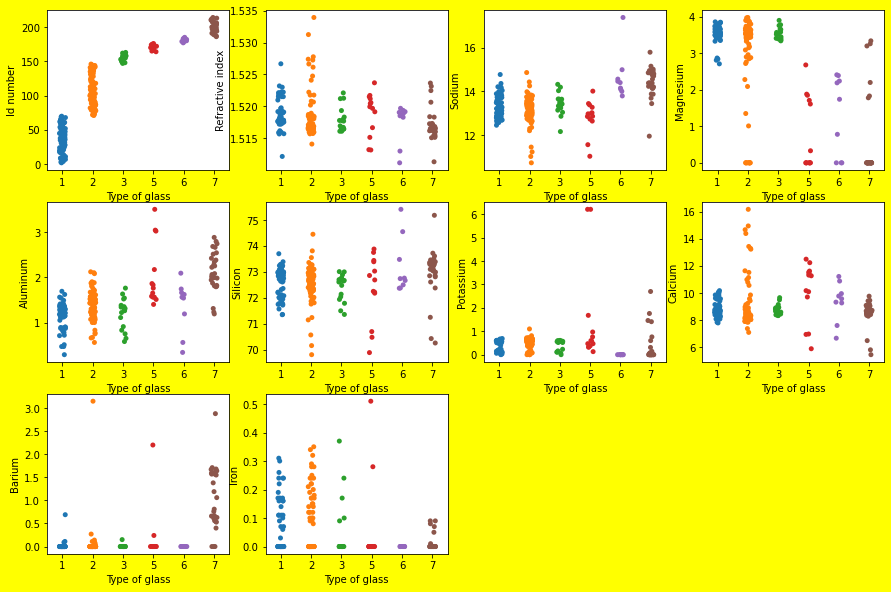

In [223]:


plt.figure(figsize=(15, 10), facecolor='yellow')
plotnumber = 1 

for column in X: 
    if plotnumber <= 10:
        ax = plt.subplot(3,4,plotnumber)
        sns.stripplot(Y,X[column])
    plotnumber+=1    
plt.show()

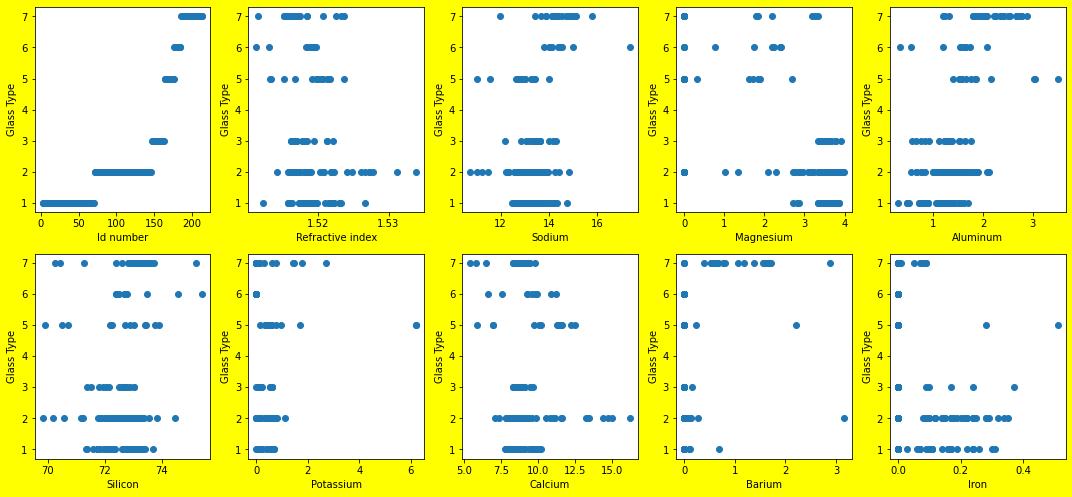

In [224]:
#Visualising the relationship. 
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10), facecolor='yellow')
plotnumber = 1 

for column in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(3, 5, plotnumber)
        plt.scatter(df[column], Y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Glass Type', fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [225]:
from scipy.stats import zscore
out_features=df[['Refractive index','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron']]
z=np.abs(zscore(out_features))
z

,Refractive index,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,0.245101,0.642937,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301
1,0.716826,0.608144,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301
2,0.228607,0.705564,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301
3,0.307777,0.656854,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301
4,0.789399,0.649895,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200
...,...,...,...,...,...,...,...,...
208,0.700332,1.862164,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301
209,0.495808,1.862164,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301
210,0.757727,1.862164,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301
211,0.607966,1.862164,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301


In [226]:
#threshold=3
np.where(z>3)

(array([104, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111, 130,
        144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 187, 188,
        200, 200, 202, 206, 212], dtype=int64),
 array([5, 0, 3, 5, 6, 0, 3, 5, 5, 5, 0, 5, 5, 7, 7, 2, 3, 6, 2, 4, 2, 4,
        7, 3, 3, 6, 3, 4, 6, 6, 6], dtype=int64))

In [227]:
z.iloc[170,2]

3.1952086998424423

In [228]:
df1 = df[(z < 3).all(axis=1)]
print(df.shape)

(213, 11)


In [229]:
#Calculate z-scores
z = np.abs(zscore(X))

#Filtering features and target for z-scores less than 3
X1 = X[(z < 3).all(axis=1)]
Y1 = Y[(z < 3).all(axis=1)]

In [230]:
# Shape of old and new dataframe
print("old Data Frame :  ",df.shape[0])
print("New Data Frame :  ",df1.shape[0])

old Data Frame :   213
New Data Frame :   193


In [231]:
print("Data Loss Percentage = ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage =  9.389671361502346


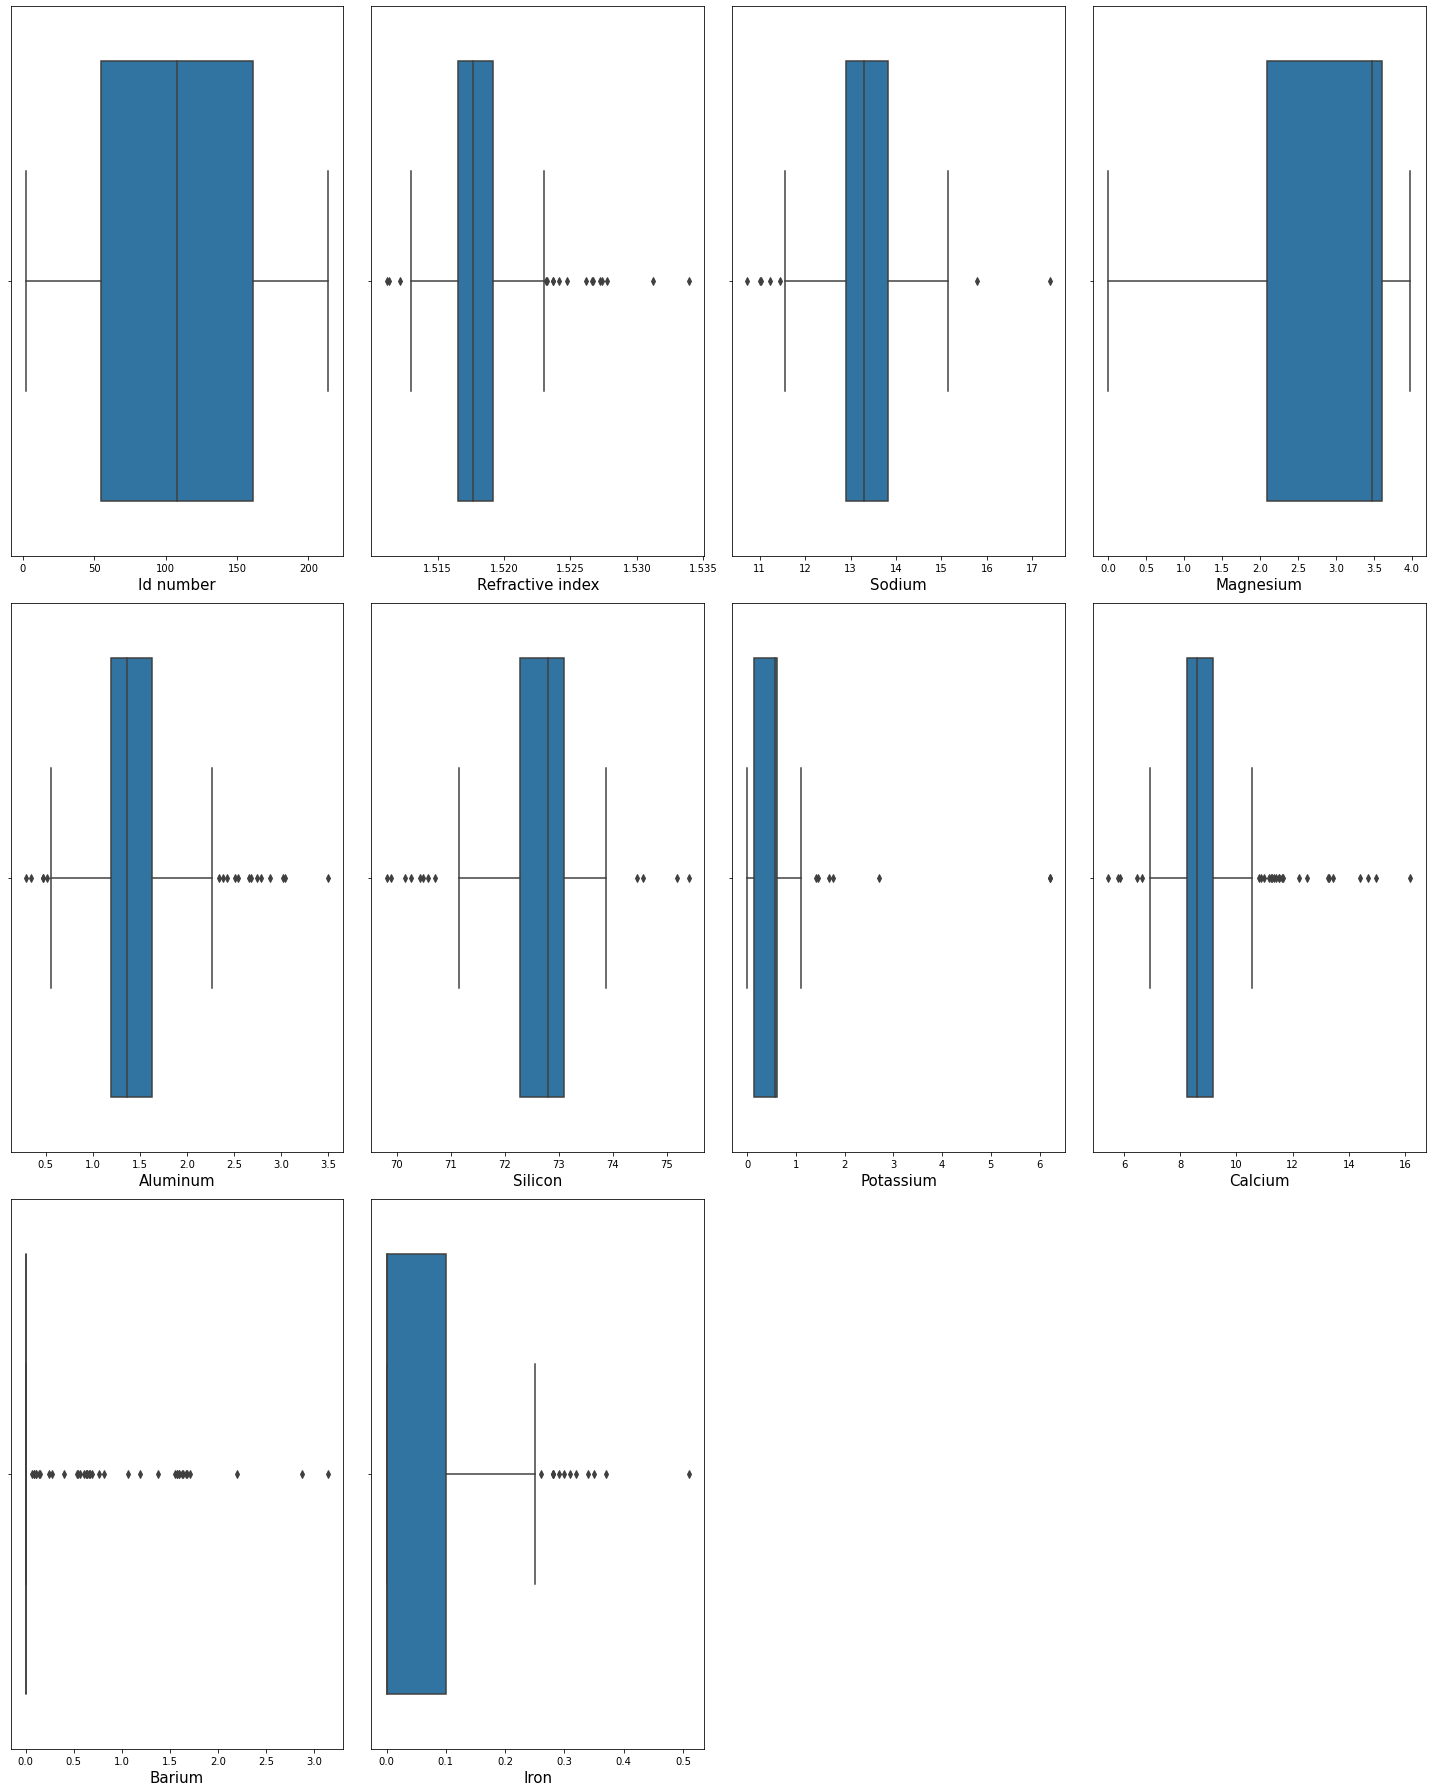

In [190]:
# Visualize the outliers using boxplot 
plt.figure(figsize=(20, 25))
graph = 1

for column in X.columns:
    if graph <= 10:
        plt.subplot(3, 4, graph)
        sns.boxplot(x=X[column])
        plt.xlabel(column, fontsize=15)
        graph += 1

plt.tight_layout()
plt.show()

In [191]:
# It is observed that only Magnesium doesnot have any outliers present in the dataframe. 

In [192]:
#Find the IQR ( inter quantile range) to identify the outliers 

# 1st quantile 
q1 = df.quantile(0.25)

# 3rd quantile 
q3 = df.quantile(0.75)

#IQR
iqr = q3 - q1

# Outlier Dectection formula 

- higher side ==> Q3+(1.5*iqr)
- lower side ==> Q1+(1.5*iqr)

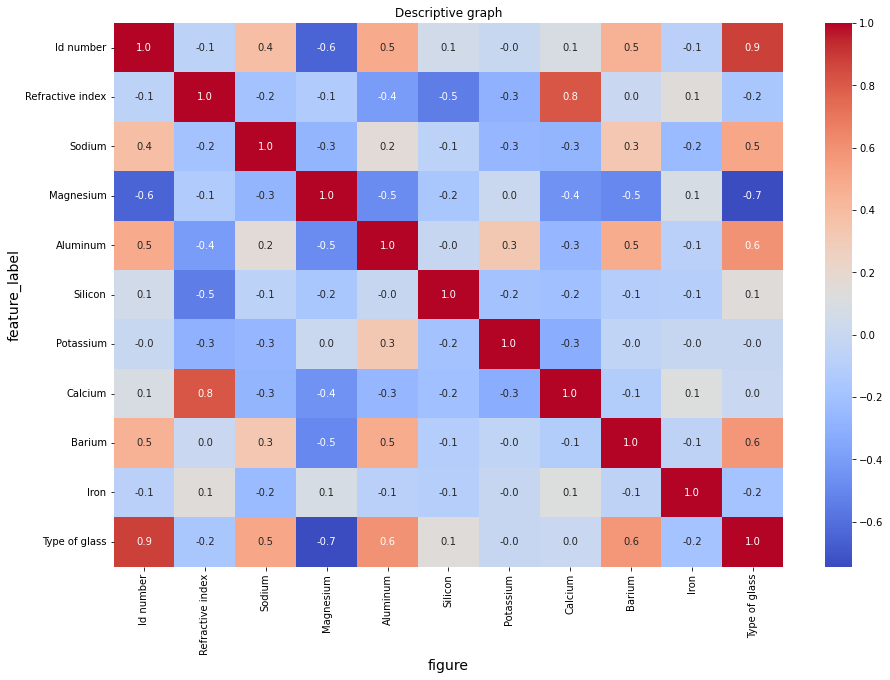

In [193]:
# Plotting the correlation on the graph. 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.1f")
plt.title("Descriptive graph")
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_label',fontsize=14)
plt.show()

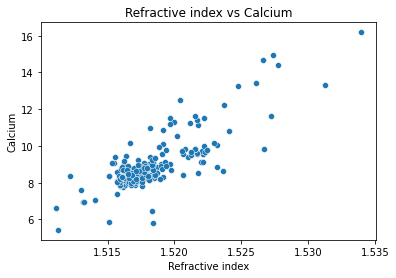

In [194]:
# Seems like Refractive index and the calcium are related to each other
sns.scatterplot(df['Refractive index'], df.Calcium)  
plt.xlabel('Refractive index')
plt.ylabel('Calcium')
plt.title('Refractive index vs Calcium')
plt.show()

We will keep calcium in the dataframe as it contributes more to the quality. Also it is seen that the RI also increases with the increase in the calcium.

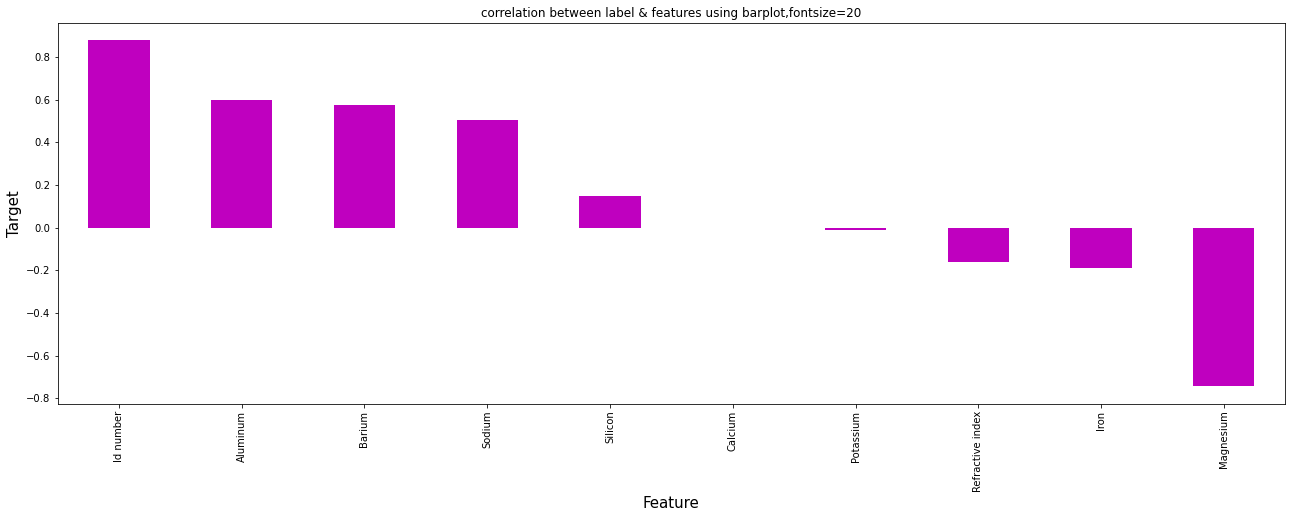

In [195]:
#Visualizing the correlation between label and feature using bar plot.
plt.figure(figsize=(22,7))
df.corr()['Type of glass'].sort_values(ascending=False).drop(['Type of glass']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel ('Target', fontsize=15)
plt.title("correlation between label & features using barplot,fontsize=20")
plt.show()

In [196]:
window_glass_df = df[df['Type of glass'].isin([1, 2, 3, 4])]
non_window_glass_df = df[df['Type of glass'].isin([5, 6, 7])]

In [197]:
#divinding the data into the labels and the features. 
X = window_glass_df.drop(columns=['Type of glass','Refractive index'])
Y = window_glass_df['Type of glass']

In [198]:
X1 = non_window_glass_df.drop(columns=['Type of glass','Refractive index'])
Y1 = non_window_glass_df['Type of glass']

In [199]:
#Scaling the data Z=(X-mean)/std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x1_scaled = scaler.fit_transform(X1)

The above method will help to check the multicollinearity problem. Find if one features is dependent on the another features// 

In [200]:
x_scaled
x1_scaled

array([[-1.69841555e+00, -5.36451129e-02,  1.78460581e+00,
         2.58905682e+00, -2.77164370e+00,  8.80434840e-01,
        -2.03396475e+00,  2.11322130e+00, -2.82832963e-01],
       [-1.63047893e+00, -1.26539354e+00,  1.02355036e+00,
        -1.80108300e-01, -1.54672526e-01,  3.17412631e-02,
         6.56569323e-01, -8.65465003e-01, -2.82832963e-01],
       [-1.56254231e+00, -2.37300735e+00,  1.05105839e+00,
        -6.86662895e-01,  4.21500959e-03, -7.04162972e-02,
         1.49815818e+00, -8.65465003e-01, -2.82832963e-01],
       [-1.49460569e+00, -2.87474693e+00,  8.95179564e-01,
        -6.86662895e-01,  5.46301895e-01,  1.60247153e-02,
         1.63204732e+00, -8.65465003e-01, -2.82832963e-01],
       [-1.42666906e+00, -1.35059461e+00, -6.72778053e-01,
        -5.34696517e-01,  8.36037989e-01, -1.41140762e-01,
         1.57466626e+00, -8.65465003e-01, -2.82832963e-01],
       [-1.35873244e+00, -1.14232534e+00, -6.72778053e-01,
        -2.30763760e-01,  9.57540222e-01,  3.224973

In [201]:
x_scaled.shape[1]
x1_scaled.shape[1]

9

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [203]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=22)

In [204]:
# Write one function and call as many as time to check accuracy_score of different models 
from sklearn.metrics import accuracy_score, classification_report

def metric_score(clf, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred_train = clf.predict(X_train)

        print("\n================================Train Result========================")

        print(f"Accuracy Score: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")

    else:
        y_pred_test = clf.predict(X_test)

        print("\n================================Test Result========================")
        print(f"Accuracy Score: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")

        print('\n \n Test Classification Report \n', classification_report(y_test, y_pred_test, digits=2))       

In [205]:
# Model Initiation 
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [206]:
# call the function and pass the dataset to check train and test score. 
metric_score(clf, X_train, X_test, y_train, y_test, train=True)
metric_score(clf, X_train, X_test, y_train, y_test, train=False)


================================Train Result========================
Accuracy Score: 100.00%

================================Test Result========================
Accuracy Score: 100.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         3

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [207]:
# Checking for the non_window_glass

In [208]:
def metric_score(clf, X1_train, X1_test, y1_train, y1_test, train=True):
    if train:
        y1_pred_train = clf.predict(X1_train)

        print("\n================================Train Result========================")

        print(f"Accuracy Score: {accuracy_score(y1_train, y1_pred_train) * 100:.2f}%")

    else:
        y1_pred_test = clf.predict(X1_test)

        print("\n================================Test Result========================")
        print(f"Accuracy Score: {accuracy_score(y1_test, y1_pred_test) * 100:.2f}%")

        print('\n \n Test Classification Report \n', classification_report(y1_test, y1_pred_test, digits=2))      

In [209]:
metric_score(clf, X1_train, X1_test, Y1_train, Y1_test, train=True)
metric_score(clf, X1_train, X1_test, Y1_train, Y1_test, train=False)


================================Train Result========================
Accuracy Score: 0.00%

================================Test Result========================
Accuracy Score: 0.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       3.0
           7       0.00      0.00      0.00       8.0

    accuracy                           0.00      11.0
   macro avg       0.00      0.00      0.00      11.0
weighted avg       0.00      0.00      0.00      11.0



In [210]:
def metric_score(clf, X1_train, X1_test, y1_train, y1_test, train=True):
    if train:
        y1_pred_train = clf.predict(X1_train)

        print("\n================================Train Result========================")

        print(f"Accuracy Score: {accuracy_score(y1_train, y1_pred_train) * 100:.2f}%")

    else:
        y1_pred_test = clf.predict(X1_test)

        print("\n================================Test Result========================")
        print(f"Accuracy Score: {accuracy_score(y1_test, y1_pred_test) * 100:.2f}%")

        print('\n \n Test Classification Report \n', classification_report(y1_test, y1_pred_test, digits=2))      

In [211]:
# call the function and pass the dataset to check train and test score. 
metric_score(clf, X1_train, X1_test, Y1_train, Y1_test, train=True)
metric_score(clf, X1_train, X1_test, Y1_train, Y1_test, train=False)


================================Train Result========================
Accuracy Score: 0.00%

================================Test Result========================
Accuracy Score: 0.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       3.0
           7       0.00      0.00      0.00       8.0

    accuracy                           0.00      11.0
   macro avg       0.00      0.00      0.00      11.0
weighted avg       0.00      0.00      0.00      11.0



In [212]:
#Since the above model is not fitting with the Train and test data. We shall work on another model. 

Confusion Matrix for Mutliclass

In [152]:
# Predict for the confusion matrix 
y1_pred = clf.predict(X1_test)

In [159]:
#Create the confusion matrix 
confusion_matrix(Y1_test,y1_pred)

array([[0, 0, 0],
       [3, 0, 0],
       [8, 0, 0]], dtype=int64)

In [160]:
pd.DataFrame(confusion_matrix(Y1_test,y1_pred), columns = ['Q3','Q5','Q7'], index = ['Q3','Q5','Q7'])

,Q3,Q5,Q7
Q3,0,0,0
Q5,3,0,0
Q7,8,0,0
